Global Energy Data Analysis
Introduction
This Jupyter Notebook presents a comprehensive analysis of global data on energy access, renewable energy usage, and their socioeconomic implications. Using data from the year 2000 to 2020, we will explore how different nations have progressed in terms of energy infrastructure and environmental sustainability, and how these factors correlate with economic indicators such as GDP per capita.
The data analyzed include key metrics like the percentage of the population with access to electricity, the use of clean fuels for cooking, electricity generation from renewable and fossil sources, and CO2 emissions. These indicators are crucial for understanding global energy policies and their impacts on both human development and the environment.

Objectives of the Analysis
Evaluate Electricity Access: Analyze how access to electricity has changed over time and its impact on human and economic development.
Explore Renewable Energy Usage: Determine the evolution of renewable energy usage and its contribution to the global energy supply.
Relationship between Energy and Economy: Study the interactions between energy consumption, CO2 emissions, and economic growth.
Identify Trends and Correlations: Discover significant patterns and correlations between different energy and economic indicators.

In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the CSV file to check the contents
file_path = 'Copia de global-data-on-sustainable-energy (1).csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe and its basic information
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

(        Entity  Year  Access to electricity (% of population)  \
 0  Afghanistan  2000                                 1.613591   
 1  Afghanistan  2001                                 4.074574   
 2  Afghanistan  2002                                 9.409158   
 3  Afghanistan  2003                                14.738506   
 4  Afghanistan  2004                                20.064968   
 
    Access to clean fuels for cooking  \
 0                                6.2   
 1                                7.2   
 2                                8.2   
 3                                9.5   
 4                               10.9   
 
    Renewable-electricity-generating-capacity-per-capita  \
 0                                               9.22      
 1                                               8.86      
 2                                               8.47      
 3                                               8.09      
 4                                               7.75 

Prepare the Data: Load the CSV file and conduct an initial inspection.
Generate Descriptive Statistics: Calculate basic statistics such as mean, median, etc.
Create Bar Charts and Pie Charts: Visualize the distribution of some categorical variables.
Calculate Quartiles, Identify Outliers, and Create Box Plots: To better understand the dispersion and extreme values in the data.
Create Line Charts and Scatter Plots: To observe trends and relationships between two variables.
Calculate Correlation and Regression: To analyze the statistical relationship between variables.
First, let's load the file and see what data it contains. This will help us better understand how to proceed with the following steps.
The loaded dataset contains several columns related to energy access, the use of renewable sources, electricity production, and economic and demographic variables by country and year. Here are some key details about the columns:

In [5]:
# Basic data cleaning: Removing rows with all NaN values and filling remaining NaNs with zeros for simplicity
cleaned_data = data.dropna(how='all').fillna(0)

# Generating summary statistics for the numerical columns
summary_statistics = cleaned_data.describe()

summary_statistics

,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Land Area(Km2),Latitude,Longitude
count,3649.000000,3649.000000,3649.000000,3649.000000,3.649000e+03,3649.000000,3649.000000,3649.000000,3649.000000,3649.000000,3649.000000,3649.000000,3.649000e+03,3649.000000,3649.000000,3649.000000,3.649000e+03,3649.000000,3649.000000
mean,2010.038367,78.717386,60.325678,84.271779,4.028212e+07,30.902949,69.960052,12.985755,23.830074,36.377600,25743.981745,5.006271,1.411153e+05,4.966813,3.142627,12257.185045,6.330400e+05,18.241387,14.818632
std,6.054228,30.514395,40.380261,216.416174,2.004093e+08,29.996934,347.089451,71.776775,104.145855,34.341921,34773.221366,3.643481,7.286793e+05,11.313904,5.519828,19262.267603,1.585337e+06,24.157809,66.339507
min,2000.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-62.075920,0.000000,0.000000e+00,-40.900557,-175.198242
25%,2005.000000,58.721474,14.600000,0.000000,0.000000e+00,4.480000,0.280000,0.000000,0.040000,2.198241,3116.737300,2.990000,6.500000e+02,0.000000,0.500010,950.880346,2.571300e+04,3.202778,-11.779889
50%,2010.000000,98.264870,78.850000,7.890000,0.000000e+00,20.710000,2.940000,0.000000,1.420000,26.824644,13120.570000,4.120000,7.280000e+03,0.000000,3.184043,4043.662923,1.176000e+05,17.189877,19.145136
75%,2015.000000,100.000000,100.000000,67.600000,2.070000e+06,52.610000,26.520000,0.000000,9.560000,64.022670,33892.780000,5.880000,5.133000e+04,4.291226,5.543639,13992.744480,5.131200e+05,38.969719,46.199616
max,2020.000000,100.000000,100.000000,3060.190000,5.202310e+09,96.040000,5184.130000,809.410000,2184.940000,100.000010,262585.700000,32.570000,1.070722e+07,86.836586,123.139555,123514.196700,9.984670e+06,64.963051,178.065032


Year: The data cover from the year 2000 to 2020.
Access to Electricity: 75% of the observations show access to electricity of at least 100%, but the minimum is 0%, indicating considerable variability among different countries or regions.
Access to Clean Fuels for Cooking: There is a large disparity, with an average of 60.33% and a minimum of 0%.
Renewable Energy per Capita: The per capita renewable energy generating capacity varies significantly, with maximum values of 3060.19 but a median of only 7.89, indicating that some countries are very advanced in this.
Energy Intensity of Primary Energy: The intensity varies from a minimum of 0 MJ per $2017 PPP of GDP to a maximum of 32.57 MJ.

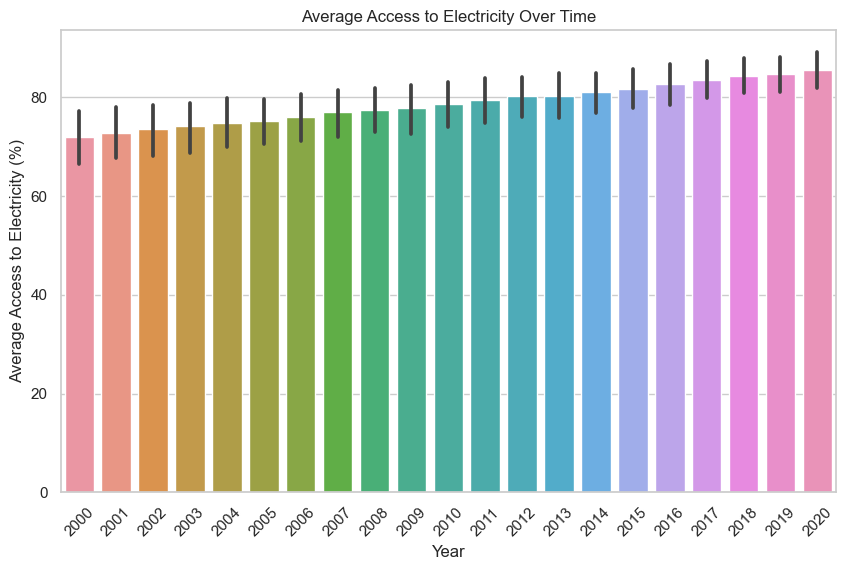

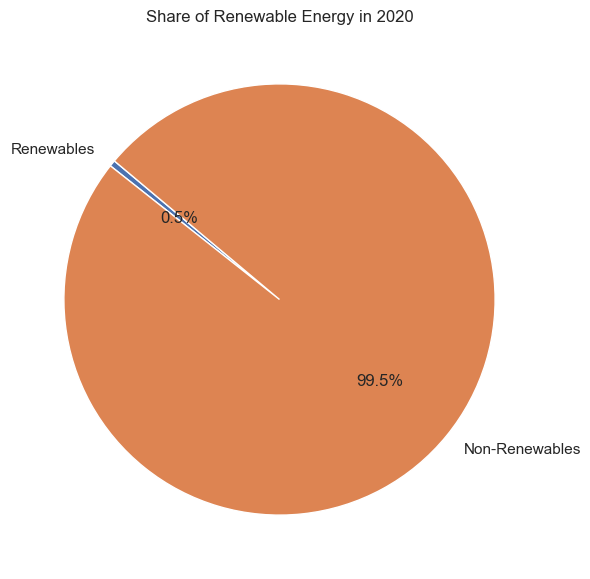

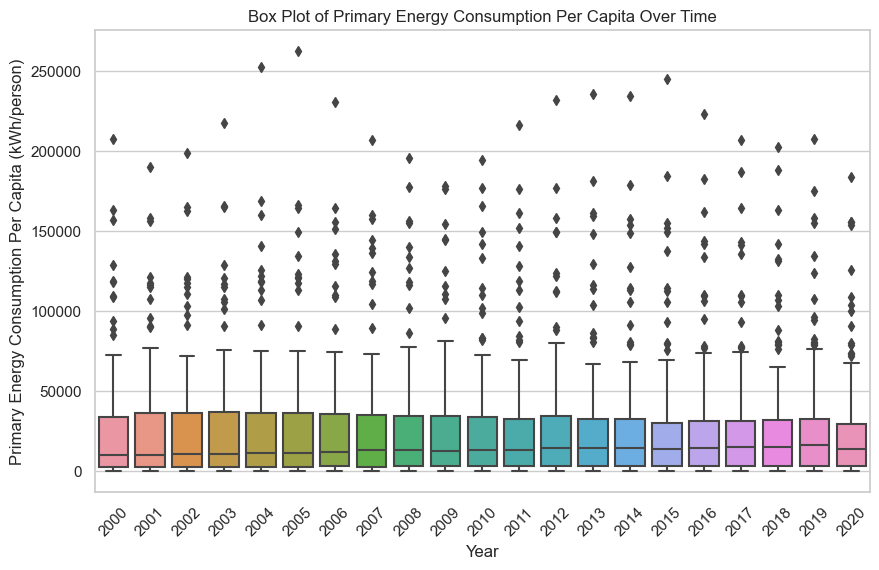

c:\Users\Ro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


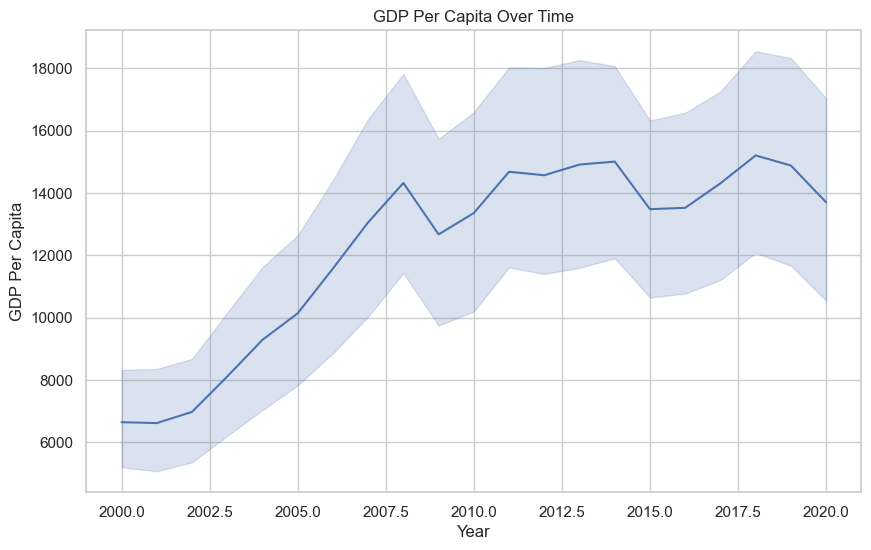

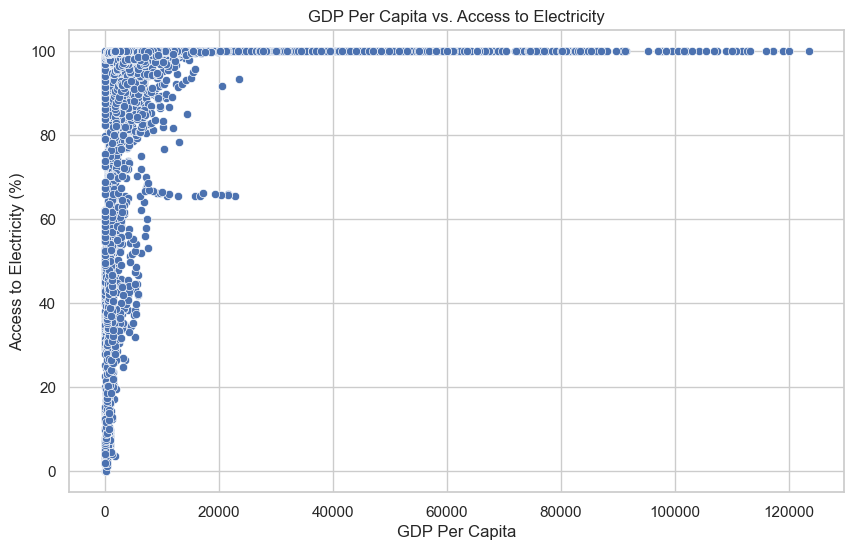

ValueError: could not convert string to float: 'Afghanistan'

In [6]:
# Setting up the aesthetic for plots
sns.set(style="whitegrid")

# Create a bar chart for the 'Access to electricity (% of population)'
plt.figure(figsize=(10, 6))
sns.barplot(x="Year", y="Access to electricity (% of population)", data=cleaned_data, estimator=lambda x: sum(x)/len(x))
plt.title('Average Access to Electricity Over Time')
plt.xticks(rotation=45)
plt.ylabel('Average Access to Electricity (%)')
plt.xlabel('Year')
plt.show()

# Create a pie chart for the share of renewable energy in the latest year (2020)
latest_year_data = cleaned_data[cleaned_data['Year'] == 2020]
labels = ['Renewables', 'Non-Renewables']
sizes = [
    latest_year_data['Renewable energy share in the total final energy consumption (%)'].mean(),
    100 - latest_year_data['Renewable energy share in the total final energy consumption (%)'].mean()
]
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Share of Renewable Energy in 2020')
plt.show()

# Create a box plot for primary energy consumption per capita
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Primary energy consumption per capita (kWh/person)', data=cleaned_data)
plt.title('Box Plot of Primary Energy Consumption Per Capita Over Time')
plt.xticks(rotation=45)
plt.ylabel('Primary Energy Consumption Per Capita (kWh/person)')
plt.xlabel('Year')
plt.show()

# Create a line plot for GDP per capita over time
plt.figure(figsize=(10, 6))
sns.lineplot(x="Year", y="gdp_per_capita", data=cleaned_data)
plt.title('GDP Per Capita Over Time')
plt.ylabel('GDP Per Capita')
plt.xlabel('Year')
plt.show()

# Scatter plot of GDP per capita vs. Access to electricity
plt.figure(figsize=(10, 6))
sns.scatterplot(x="gdp_per_capita", y="Access to electricity (% of population)", data=cleaned_data)
plt.title('GDP Per Capita vs. Access to Electricity')
plt.ylabel('Access to Electricity (%)')
plt.xlabel('GDP Per Capita')
plt.show()

# Calculate the correlation matrix
correlation_matrix = cleaned_data.corr()
correlation_matrix


Bar Chart - Access to Electricity Over Time: This chart shows how access to electricity has evolved over the years on average.
Pie Chart - Renewable Energy Share in 2020: Presents the percentage of renewable energy in the total final energy consumption in the year 2020.
Box Plot - Per Capita Primary Energy Consumption: Exposes the distribution of per capita primary energy consumption over the years, identifying possible outliers.
Line Chart - GDP Per Capita Over Time: Shows how GDP per capita has changed over the years.
Scatter Plot - GDP Per Capita vs. Access to Electricity: Explores the relationship between GDP per capita and access to electricity.
Additionally, I have calculated the correlation matrix to understand the relationships between the variables. Some interesting observations are:
There is a strong correlation between energy consumption and CO2 emissions, which is expected as higher energy consumption often implies higher emissions.
There is a positive correlation between GDP per capita and access to electricity, suggesting that as a country's economy improves, so does access to basic services like electricity.
The correlation between GDP growth and other variables is generally low, which may indicate that annual economic growth is influenced by multiple factors besides energy development and access to resources.

C:\Users\Ro\AppData\Local\Temp\ipykernel_18968\1288585868.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='Renewable-electricity-generating-capacity-per-capita (%) Change', data=cleaned_data, estimator='mean', ci=None)
c:\Users\Ro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


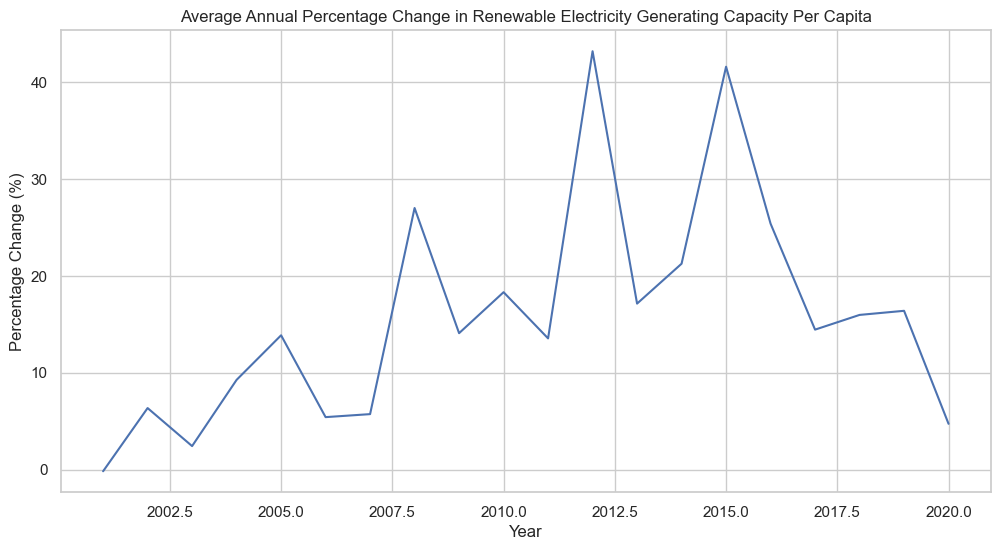

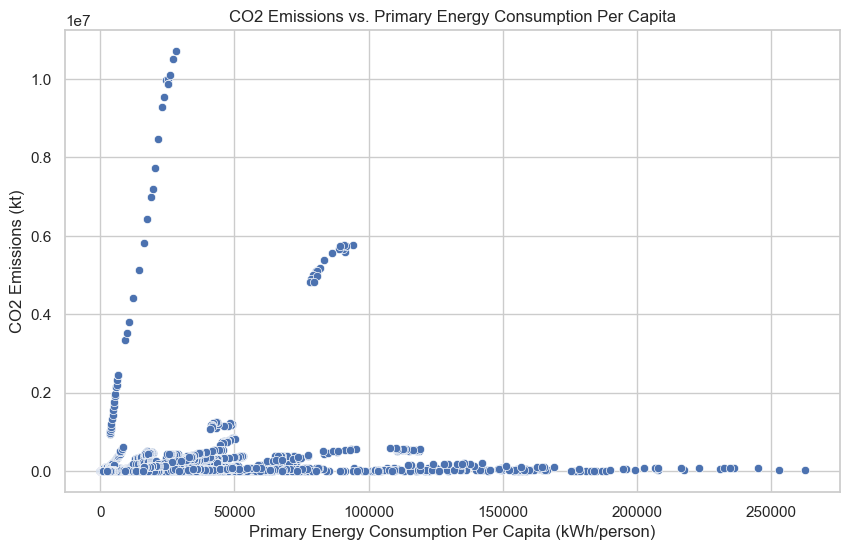

In [8]:
# Calculating the year-on-year percentage change
cleaned_data['Renewable-electricity-generating-capacity-per-capita (%) Change'] = cleaned_data.groupby('Entity')['Renewable-electricity-generating-capacity-per-capita'].pct_change() * 100

# Visualize the average annual change by year
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Renewable-electricity-generating-capacity-per-capita (%) Change', data=cleaned_data, estimator='mean', ci=None)
plt.title('Average Annual Percentage Change in Renewable Electricity Generating Capacity Per Capita')
plt.ylabel('Percentage Change (%)')
plt.xlabel('Year')
plt.grid(True)
plt.show()

# 2. Emisiones de CO2 en Relación al Consumo de Energía Primaria Per Cápita
# Scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Primary energy consumption per capita (kWh/person)', y='Value_co2_emissions_kt_by_country', data=cleaned_data)
plt.title('CO2 Emissions vs. Primary Energy Consumption Per Capita')
plt.xlabel('Primary Energy Consumption Per Capita (kWh/person)')
plt.ylabel('CO2 Emissions (kt)')
plt.grid(True)
plt.show()


Line Chart - Average Annual Change in Per Capita Renewable Energy Generating Capacity:
This chart displays the average annual percentage change in per capita renewable energy generating capacity globally. The percentage changes are calculated from one year to the next, and the average for all countries available in the dataset is shown.
Scatter Plot - CO2 Emissions vs. Per Capita Primary Energy Consumption:
This chart explores the relationship between CO2 emissions and per capita primary energy consumption. Each point on the chart represents a country in a specific year, showing how higher rates of energy consumption are related to CO2 emissions.

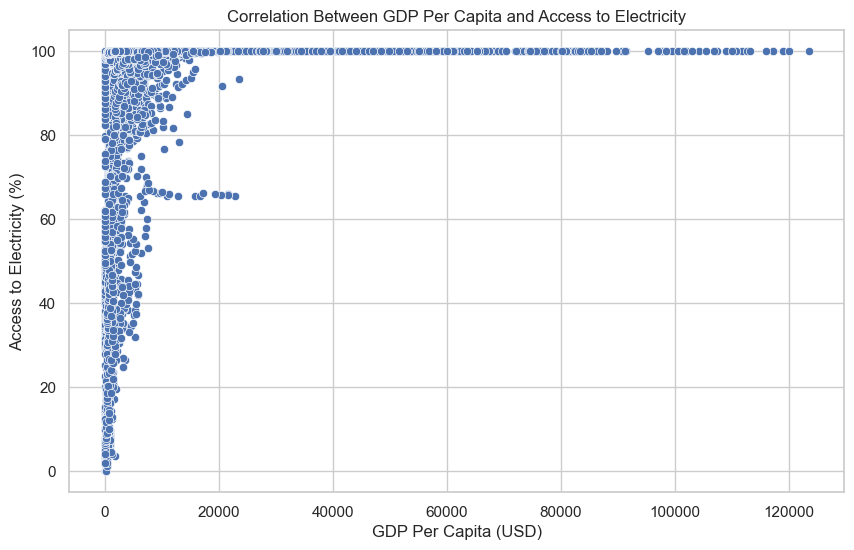

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="gdp_per_capita", y="Access to electricity (% of population)", data=cleaned_data)
plt.title('Correlation Between GDP Per Capita and Access to Electricity')
plt.xlabel('GDP Per Capita (USD)')
plt.ylabel('Access to Electricity (%)')
plt.grid(True)
plt.show()


Correlation Between Access to Electricity and GDP Per Capita
This analysis aims to understand how access to electricity is related to the economic development of a country, measured through GDP per capita.

c:\Users\Ro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


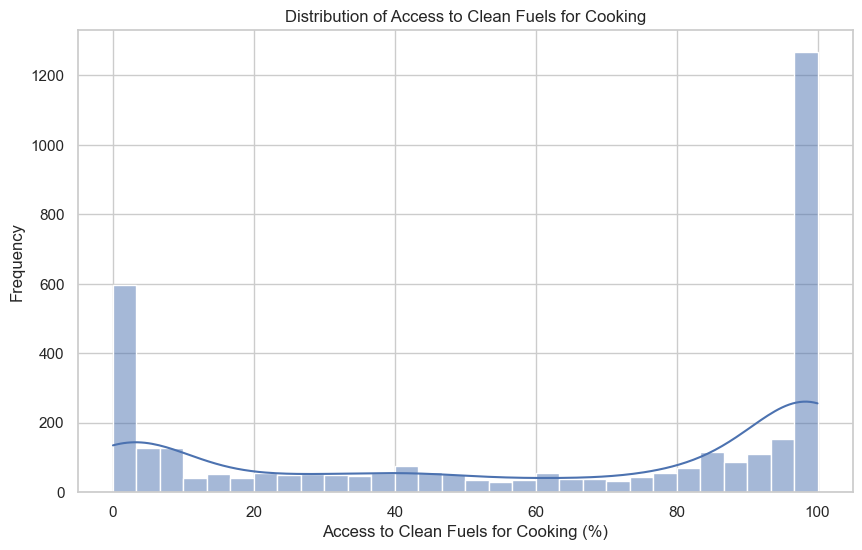

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_data['Access to clean fuels for cooking'], bins=30, kde=True)
plt.title('Distribution of Access to Clean Fuels for Cooking')
plt.xlabel('Access to Clean Fuels for Cooking (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Distribution of Access to Clean Cooking Fuels
This chart can help visualize how widespread access to cleaner and more sustainable cooking methods is across different countries or over time.

C:\Users\Ro\AppData\Local\Temp\ipykernel_18968\2474387199.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='Energy intensity level of primary energy (MJ/$2017 PPP GDP)', data=cleaned_data, estimator='mean', ci=None)
c:\Users\Ro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


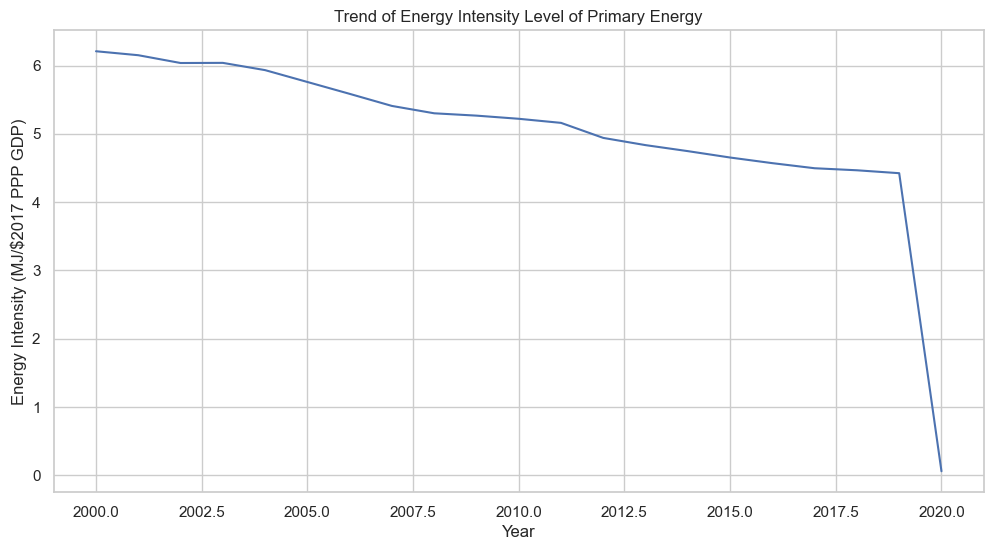

In [11]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Energy intensity level of primary energy (MJ/$2017 PPP GDP)', data=cleaned_data, estimator='mean', ci=None)
plt.title('Trend of Energy Intensity Level of Primary Energy')
plt.xlabel('Year')
plt.ylabel('Energy Intensity (MJ/$2017 PPP GDP)')
plt.grid(True)
plt.show()

Analysis of Energy Intensity Trends
This analysis can show how countries are progressing in terms of energy efficiency by observing the energy intensity of the economy.

Summary of Key Findings
Access to electricity and GDP per capita show a strong positive correlation, indicating that improved electrical infrastructure may be associated with higher economic development.
Per capita renewable energy generation capacity has shown significant growth, especially in recent years, reflecting an increasing commitment to sustainable energies.

Strategic Recommendations
Increase investment in infrastructure for the development of renewable energies in regions with low access to electricity.
Promote policies that encourage the reduction of energy intensity in key industrial sectors to improve energy efficiency.

Proposals for Future Research or Actions
Conduct a detailed analysis of the impact of renewable energy access programs on the economic growth of less developed regions.
Assess the feasibility of new clean energy technologies in emerging markets.